Training the model...
Epoch 1/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8029 - loss: 0.5898 - val_accuracy: 0.9821 - val_loss: 0.0550
Epoch 2/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9654 - loss: 0.1150 - val_accuracy: 0.9869 - val_loss: 0.0371
Model input: <KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=keras_tensor_20>
Model output: <KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_29>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


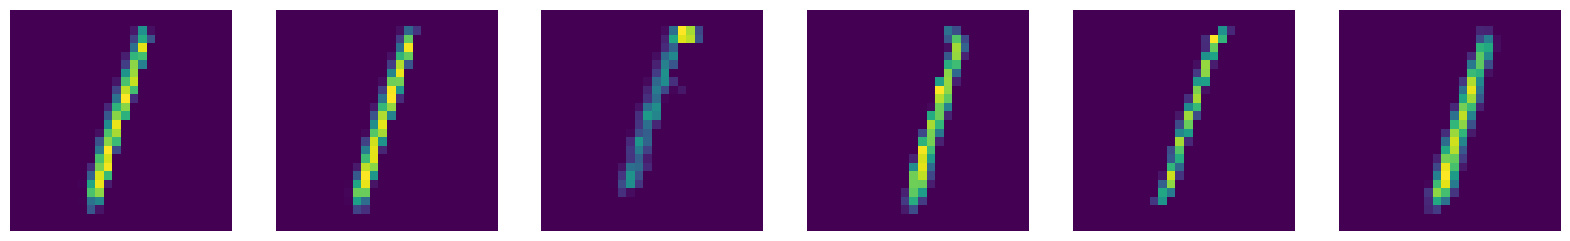

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Activation

# 1. Загружаем данные MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Нормализуем данные и изменяем форму
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. Создаем модель с использованием функционального API
input_layer = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(10, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. Обучение модели
print("Training the model...")
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=64)

# 4. Проверяем входы и выходы
print("Model input:", model.input)
print("Model output:", model.output)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


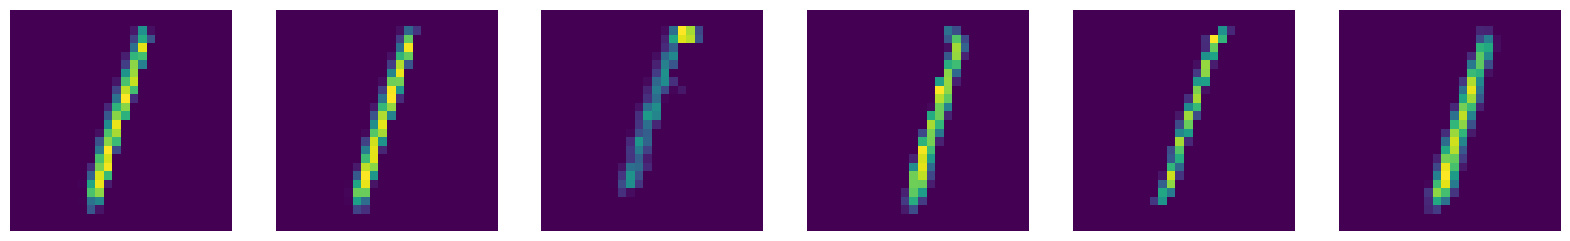

In [8]:
# 5. Создаем промежуточную модель для извлечения активаций
conv_layer_outputs = [layer.output for layer in model.layers if isinstance(layer, Conv2D)]
activation_model = Model(inputs=model.input, outputs=conv_layer_outputs)

# 6. Извлекаем активации для одного изображения
example_image = x_test[2].reshape(1, 28, 28, 1)
activations = activation_model.predict(example_image)

# 7. Визуализация активаций первого сверточного слоя
first_layer_activation = activations[0]
n_filters = first_layer_activation.shape[-1]

fig, axes = plt.subplots(1, 6, figsize=(20, 20))
for i in range(6):  # Показываем первые 6 фильтров
    axes[i].imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    axes[i].axis('off')
plt.show()
